# MILESTONE 3

# For Car Dataset With Hyperparameter Tunning 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [4]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [7]:
# handling missing values:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [9]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [10]:
# Outlier detection and removal
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


In [11]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,Vitara Brezza VXi,925000,2021,48000,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,5.0,45.0
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0


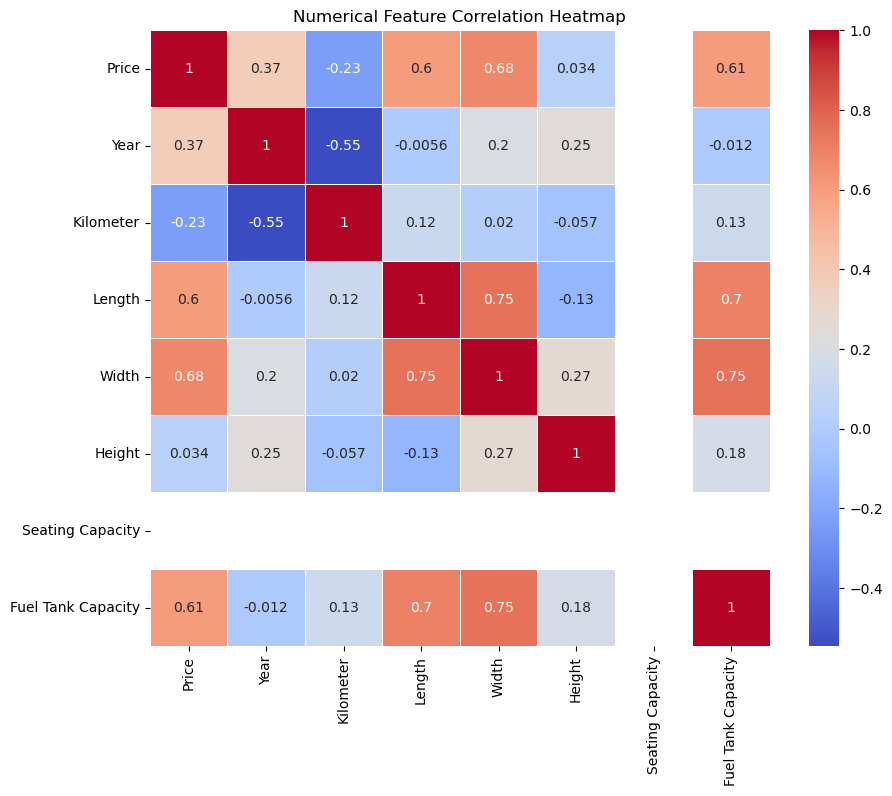

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Numerical Feature Correlation Heatmap')
plt.show()


In [13]:
print(df[['Seating Capacity', 'Transmission', 'Drivetrain']].nunique())


Seating Capacity    1
Transmission        2
Drivetrain          3
dtype: int64


In [14]:
df = df.drop('Seating Capacity', axis=1)

In [15]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,37.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,Vitara Brezza VXi,925000,2021,48000,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,48.0
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,45.0
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,43.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,32.0


In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].corr()


,Price,Year,Kilometer,Length,Width,Height,Fuel Tank Capacity
Price,1.000000,0.367030,-0.234620,0.602808,0.679677,0.034435,0.605153
Year,0.367030,1.000000,-0.545695,-0.005638,0.204526,0.245462,-0.011650
Kilometer,-0.234620,-0.545695,1.000000,0.121767,0.019528,-0.057244,0.130779
Length,0.602808,-0.005638,0.121767,1.000000,0.746715,-0.125740,0.703425
Width,0.679677,0.204526,0.019528,0.746715,1.000000,0.270104,0.752399
Height,0.034435,0.245462,-0.057244,-0.125740,0.270104,1.000000,0.176944
Fuel Tank Capacity,0.605153,-0.011650,0.130779,0.703425,0.752399,0.176944,1.000000


In [17]:
# Key Observations:
# 1. Price has strong positive correlations with:
   # - Length (0.602808)
   # - Width (0.679677)
   # - Fuel Tank Capacity (0.605153)
# 2. Price has moderate positive correlations with:
    #- Year (0.367030)
# 3. Price has weak negative correlations with:
    #- Kilometer (-0.234620)
# 4. Year has strong negative correlations with:
    #- Kilometer (-0.545695)


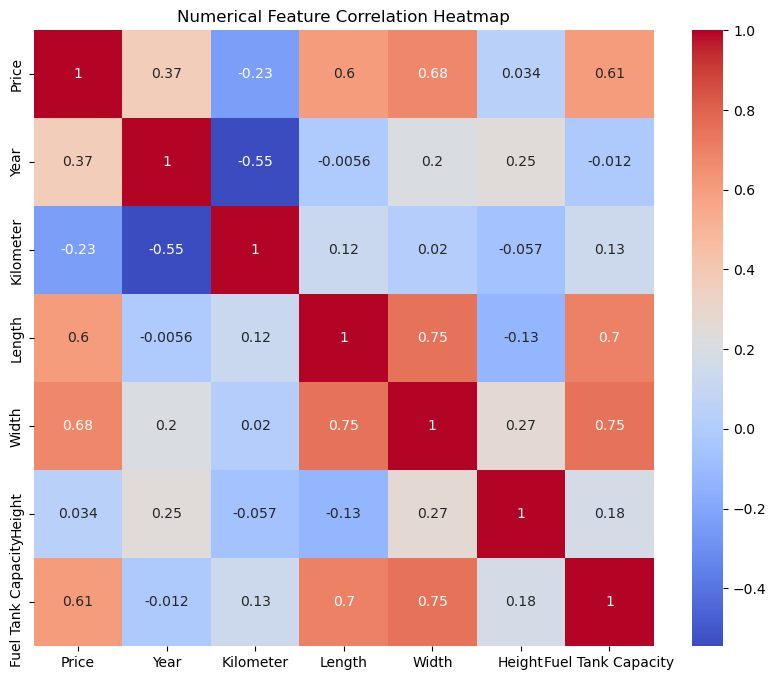

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Feature Correlation Heatmap')
plt.show()


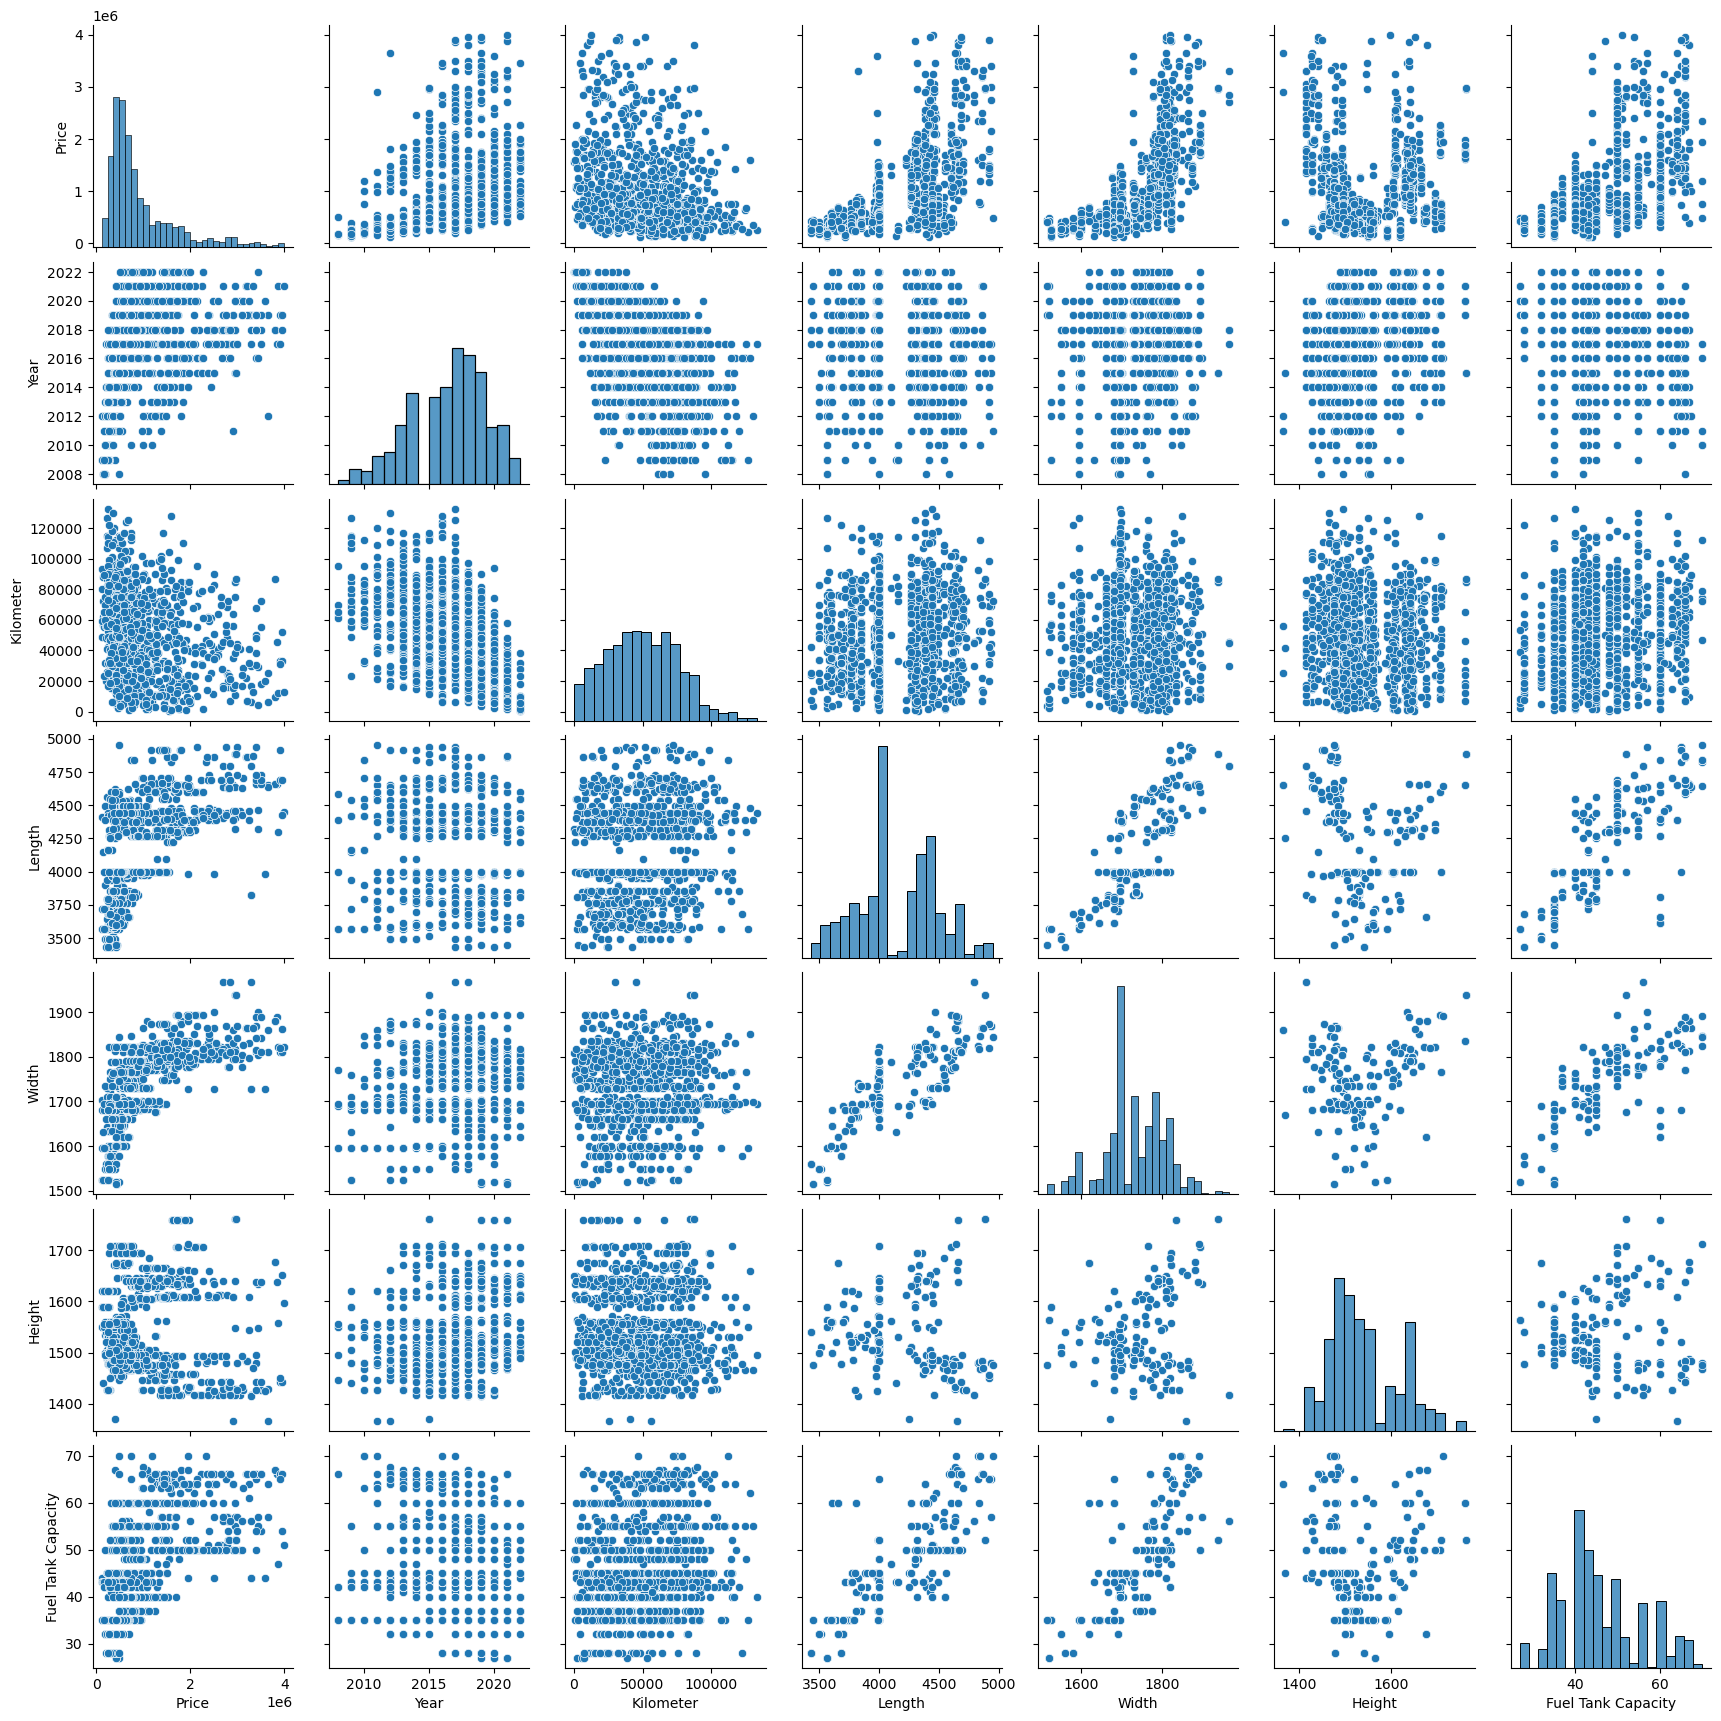

In [19]:
sns.pairplot(df[numerical_cols])
plt.show()


In [20]:
# Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object')

In [21]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,37.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,Vitara Brezza VXi,925000,2021,48000,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,48.0
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,45.0
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,43.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,32.0


In [22]:
# Splitting my data into training (80%) and testing sets (20%).
from sklearn.model_selection import train_test_split

x = df.drop('Price', axis=1)  # features
y = df['Price']  # target variable


In [23]:
x

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,35.0
1,Maruti Suzuki,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,35.0
3,Toyota,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,37.0
5,Maruti Suzuki,Ciaz ZXi,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,Vitara Brezza VXi,2021,48000,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,48.0
2052,Hyundai,i20 Sportz 1.4 CRDI,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,45.0
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,43.0
2055,Hyundai,Eon D-Lite +,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,32.0


In [24]:
y

0       505000
1       450000
2       220000
3       799000
5       675000
         ...  
2051    925000
2052    409999
2053    245000
2055    275000
2056    240000
Name: Price, Length: 1243, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    x[col] = le.fit_transform(x[col])


In [26]:
# Scaling for numerical columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
models = {
    'Linear Regression': {
        'model': LinearRegression(),
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [7,10,15,20,25,30,35],
            'max_depth': [5, 10, 15],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [2, 10, 15]
        }
    }
}

In [29]:
# Perform hyperparameter tuning and evaluation
for name, model_info in models.items():
    if 'params' in model_info:
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=10, scoring='neg_mean_squared_error')
        grid_search.fit(x_train, y_train)
        print(f"{name}:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Score: {-grid_search.best_score_}")
        best_rf = grid_search.best_estimator_
        best_rf.fit(x_train, y_train)
    else:
        model_info['model'].fit(x_train, y_train)
        best_rf = model_info['model']

    y_pred = best_rf.predict(x_test)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")
    print()


MSE: 172070832430.03564
MAE: 280326.51574778627
R2: 0.7128988390883064

Random Forest Regressor:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}
Best Score: 53094663727.00917
MSE: 63750174326.26145
MAE: 133132.62504377915
R2: 0.8936324721690735



In [30]:
import joblib
best_model = grid_search.best_estimator_
joblib.dump(grid_search,'E:/Milestone/Cars_RandomForestRegression.pkl')

['E:/Milestone/Cars_RandomForestRegression.pkl']